In [6]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

In [7]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('*R.*.fits')
print(flat_list)

['480_2018_.Flat.100S0X1.R.15.fits', '480_2018_.Flat.20S0X1.R.24.fits', '480_2018_.Flat.30S0X1.R.25.fits', '480_2018_.Flat.90S0X1.R.20.fits', '480_2018_.Flat.10S0X1.R.23.fits', '480_2018_.Flat.1S0X1.R.18.fits', '480_2018_.Flat.45S0X1.R.26.fits', '480_2018_.Flat.0S0X1.R.17.fits', '480_2018_.Flat.120S0X1.R.13.fits', '480_2018_.Flat.60S0X1.R.21.fits', '480_2018_.Flat.0S0X1.R.16.fits', '480_2018_.Flat.110S0X1.R.14.fits', '480_2018_.Flat.60S0X1.R.22.fits', '480_2018_.Flat.5S0X1.R.19.fits']


In [8]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 100.0 sec
Mean counts: 53984.93

Exposure time 20.0 sec
Mean counts: 9357.42

Exposure time 30.0 sec
Mean counts: 16175.42

Exposure time 90.0 sec
Mean counts: 52495.80

Exposure time 10.0 sec
Mean counts: 5987.54

Exposure time 1.0 sec
Mean counts: 1930.46

Exposure time 45.0 sec
Mean counts: 21377.88

Exposure time 0.2 sec
Mean counts: 1172.64

Exposure time 120.0 sec
Mean counts: 56314.68

Exposure time 60.0 sec
Mean counts: 54011.50

Exposure time 0.5 sec
Mean counts: 1369.25

Exposure time 110.0 sec
Mean counts: 55088.25

Exposure time 60.0 sec
Mean counts: 49980.81

Exposure time 5.0 sec
Mean counts: 5941.07



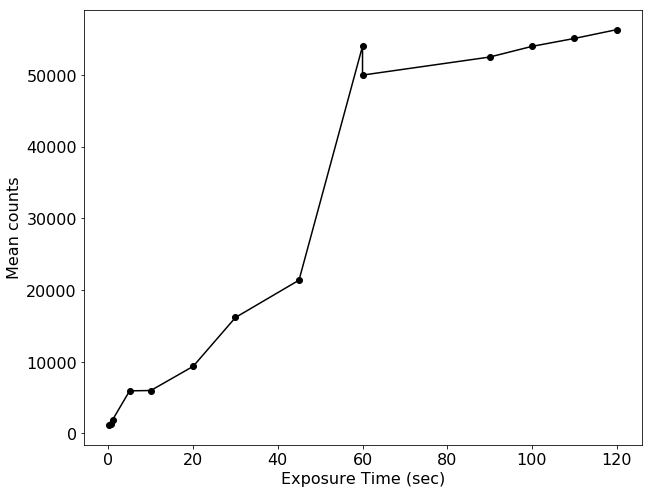

In [9]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()